### Find similar trend features
This notebook is used for finding biomarkers groups in the PLCO dataset that has similar performance changing trends when having different imbalance ratios. The model used could be simple as a single decision tree to reduce calculation and iteration time. The ratio could be varying from 1 to 5 for graph purposes. Two effects are preferably illustrated:
1. Two sets of biomarkers both do not have a high variance in performance as the ratio changes; 
2. Another set of biomarker that has decreased model performance as the ratio increases. 

In [92]:
from common_base import read_data
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [73]:
PLCO = read_data("../csv_files/PLCO.csv")
PLCO = PLCO.dropna()
case, non_case = PLCO[PLCO["is_case"]==1], PLCO[PLCO["is_case"]==0]

In [74]:
PLCO

,is_case,panela_leptin,panela_prolactin,panela_opn,panela_igf_ii,panela_mif,panela_ca_125,panelb_ca125,panelb_ca15_3,panelb_ca19_9,panelb_ca72_4,panelb_klk6,panelb_he4,panelb_ov_110,panelc_ca125,panelc_he4,panelc_mesothelin,panelc_mmp7,panelc_igfbpii_ng_ml,panelc_igfbpii_nml_lp,panelc_spondin2,panelc_slpi,panelc_ca125_log,panelc_he4_log,panelc_mesothelin_log,panelc_mmp7_sd_log,panelc_igfbpii_nml_lp_log,panelc_spondin2_log,panelc_slpi_log,paneld_hepc,paneld_itih4,paneld_ctap,paneld_tt,paneld_trf,paneld_b2m,paneld_apo,panele_eotaxin,panele_mmp_3,panele_egfr,panele_ca72_4,panele_prolactin,panele_he4,panele_ca_125_fujio
0,0,24.0,5.0,4780.0,1645.0,110.0,13.6,33.51,35.87,15.13,32.510,2.64765,90.56,43.56,1.285714,0.960000,1.129534,4404.356,238643.073,1.031796,1.236957,1.315559,0.251314,-0.040822,0.121805,-0.002149,0.031301,0.212655,0.274262,7.037571,0.191071,21.934273,35.893734,5.961977,9.243105,36.260119,3141.0,1155.0,11457.0,340.0,2739.0,96.5,74.9
1,0,32.0,6.0,7450.0,3101.0,121.0,7.0,15.17,24.11,23.88,3.050,3.38700,85.45,89.38,1.076923,0.923077,8.608696,5930.905,151864.872,0.652139,1.637128,1.068716,0.074108,-0.080043,2.152773,0.761102,-0.427498,0.492943,0.066458,6.128111,4.098713,57.284722,110.541645,9.525256,8.717912,24.270549,1938.0,1388.0,12086.0,1026.0,3920.0,773.0,92.3
2,0,45.0,13.0,3540.0,2274.0,117.0,7.0,12.24,12.76,7.95,1.390,2.37690,52.44,152.46,0.800000,0.642857,2.070175,3836.652,84051.450,0.344321,2.276826,1.060261,-0.223144,-0.441833,0.727633,-0.356080,-1.066181,0.822782,0.058515,2.820612,10.881869,28.343380,68.968762,9.100484,7.495248,18.269785,2681.0,1271.0,11626.0,634.0,7242.0,560.0,102.0
3,0,10.0,6.0,1420.0,2961.0,287.0,3.1,8.89,15.39,31.41,1.480,2.61015,105.54,153.40,0.869565,1.358491,0.500000,5828.043,240499.420,1.021981,0.890081,1.185953,-0.139762,0.306374,-0.693147,0.716229,0.021743,-0.116443,0.170547,16.095451,57.959893,64.456299,54.719373,8.611240,9.106998,32.011847,2188.0,937.0,12615.0,463.0,2419.0,322.0,29.7
4,0,7.0,4.0,1410.0,3519.0,71.0,6.8,16.32,9.44,8.69,1.240,2.16000,59.30,148.19,1.000000,0.960000,0.400000,3756.868,206461.141,1.422587,0.718315,0.802013,0.000000,-0.040822,-0.916291,-0.409979,0.352477,-0.330847,-0.220630,2.846979,54.665093,43.862319,67.227331,7.589271,6.115171,47.647759,2779.0,968.0,8203.0,181.0,3354.0,347.0,30.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,1,24.0,8.0,1000.0,2010.0,81.0,1.6,17.30,27.86,47.89,0.887,2.16000,77.55,245.31,0.857143,0.720000,0.982456,3268.435,137579.906,1.408996,1.932665,1.015684,-0.154151,-0.328504,-0.017700,-0.767194,0.342877,0.658900,0.015562,5.900179,16.830900,18.910891,56.495105,10.433205,9.762999,43.344517,1241.0,793.0,3706.0,115.0,5585.0,84.9,28.6
1065,1,28.0,8.0,830.0,3889.0,184.0,3.6,20.75,24.65,0.24,3.220,2.62260,138.96,87.95,1.333333,0.935065,1.575758,3073.002,227416.221,0.739361,0.898969,1.043034,0.287682,-0.067139,0.454736,-0.925333,-0.301969,-0.106507,0.042133,7.127623,11.139638,45.044158,63.312569,7.009618,4.698551,40.932264,1801.0,677.0,12660.0,1008.0,4704.0,1127.0,168.0
1066,1,51.0,39.0,4940.0,898.0,606.0,6.7,9.89,6.60,18.41,0.894,2.97000,88.53,205.71,0.965517,1.176471,0.327869,6310.323,50113.641,0.384730,3.328891,1.181586,-0.035091,0.162519,-1.115142,0.920147,-0.955212,1.202639,0.166857,0.169746,0.889679,34.652072,33.419817,11.702744,8.672183,20.552649,3095.0,1308.0,14052.0,364.0,17089.0,757.0,390.0
1067,1,8.0,8.0,3050.0,2275.0,38.0,126.6,275.40,145.50,8.26,13.360,3.45000,194.42,261.05,31.416667,1.090909,7.551724,12585.921,556225.778,4.643231,2.192677,1.398964,3.447339,0.087011,2.021776,2.690888,1.535410,0.785123,0.335732,3.093948,2.494108,58.634673,44.747364,8.933762,7.753205,46.233035,3370.0,783.0,8535.0,457.0,4685.0,946.0,428.0


In [75]:
columns = PLCO.drop(["is_case"], axis=1).columns
columns

Index(['panela_leptin', 'panela_prolactin', 'panela_opn', 'panela_igf_ii',
       'panela_mif', 'panela_ca_125', 'panelb_ca125', 'panelb_ca15_3',
       'panelb_ca19_9', 'panelb_ca72_4', 'panelb_klk6', 'panelb_he4',
       'panelb_ov_110', 'panelc_ca125', 'panelc_he4', 'panelc_mesothelin',
       'panelc_mmp7', 'panelc_igfbpii_ng_ml', 'panelc_igfbpii_nml_lp',
       'panelc_spondin2', 'panelc_slpi', 'panelc_ca125_log', 'panelc_he4_log',
       'panelc_mesothelin_log', 'panelc_mmp7_sd_log',
       'panelc_igfbpii_nml_lp_log', 'panelc_spondin2_log', 'panelc_slpi_log',
       'paneld_hepc', 'paneld_itih4', 'paneld_ctap', 'paneld_tt', 'paneld_trf',
       'paneld_b2m', 'paneld_apo', 'panele_eotaxin', 'panele_mmp_3',
       'panele_egfr', 'panele_ca72_4', 'panele_prolactin', 'panele_he4',
       'panele_ca_125_fujio'],
      dtype='object')

In [160]:
a_group = list(columns[:6])+["is_case"]
b_group = list(columns[7:13])+["is_case"]

In [168]:
print("Group A")
a_group

Group A


['panela_leptin',
 'panela_prolactin',
 'panela_opn',
 'panela_igf_ii',
 'panela_mif',
 'panela_ca_125',
 'is_case']

In [169]:
print("Group B")
b_group

Group B


['panelb_ca15_3',
 'panelb_ca19_9',
 'panelb_ca72_4',
 'panelb_klk6',
 'panelb_he4',
 'panelb_ov_110',
 'is_case']

In [163]:
# Group A
# Split positive and negative
pos_a = case[a_group]
neg_a = non_case[a_group]

total_results_a = []
for ratio in range(1, 6):
    repeat_results_a = []
    for i in range(0, 30):
        # dt_a = DecisionTreeClassifier(max_depth=10, random_state=42)
        # clf_a = SVC()
        clf_a = RandomForestClassifier()
        random_neg = neg_a.sample(frac=1)
        random_neg = random_neg.iloc[:len(pos_a)*ratio]
        random_dataset = pd.concat([pos_a, random_neg])
        x, y = random_dataset.drop(["is_case"], axis=1), random_dataset["is_case"]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        clf_a.fit(x_train, y_train)
        y_pred = clf_a.predict(x_test)
        repeat_results_a.append(roc_auc_score(y_test, y_pred))
    total_results_a.append(repeat_results_a)


In [164]:
# Group B
# Split positive and negative
pos_b = case[b_group]
neg_b = non_case[b_group]

total_results_b = []
for ratio in range(1, 6):
    repeat_results_b = []
    for i in range(0, 30):
        # clf_b = DecisionTreeClassifier(max_depth=10, random_state=42)
        # clf_b = SVC()
        clf_b = RandomForestClassifier()
        random_neg = neg_b.sample(frac=1)
        random_neg = random_neg.iloc[:len(pos_b)*ratio]
        random_dataset = pd.concat([pos_b, random_neg])
        x, y = random_dataset.drop(["is_case"], axis=1), random_dataset["is_case"]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        clf_b.fit(x_train, y_train)
        y_pred = clf_b.predict(x_test)
        repeat_results_b.append(roc_auc_score(y_test, y_pred))
    total_results_b.append(repeat_results_b)


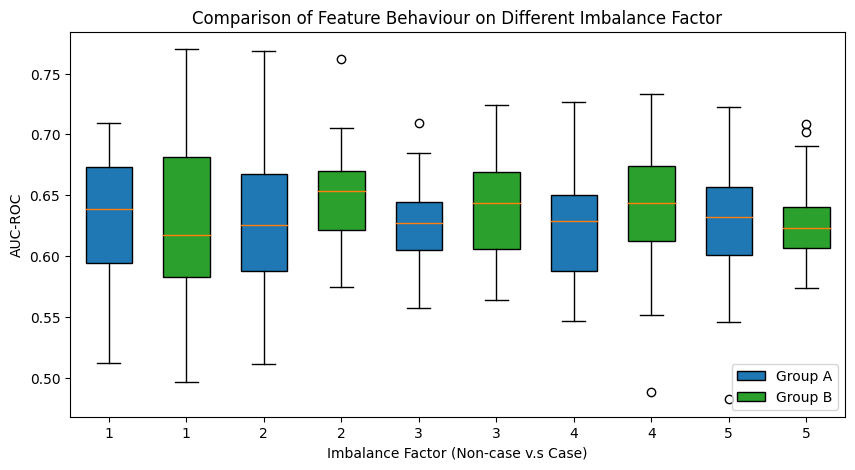

In [170]:
# Box plot A & B
fig, ax = plt.subplots(figsize=(10, 5))
bp_a = ax.boxplot(total_results_a, positions=[1,3,5,7,9], widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C0"), labels=["1", "2", "3", "4", "5"])

bp_b = ax.boxplot(total_results_b, positions=[2,4,6,8,10], widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C2"), labels=["1", "2", "3", "4", "5"])
ax.legend([bp_a["boxes"][0], bp_b["boxes"][0]], 
          ["Group A", "Group B"], loc="lower right")
plt.xlabel("Imbalance Factor (Non-case v.s Case)")
plt.ylabel("AUC-ROC")
plt.title("Comparison of Feature Behaviour on Different Imbalance Factor")
plt.show()

From the figure above, it is hard to tell which group of features (A or B) has better generality and stronger effect on ovarian cancer because across different imbalance factors, there are small differences between their model behaviours even with 30 rounds of repetition. <br>

---

In [175]:
c_group = list(columns[:5])+["is_case"]

# Group C
# Split positive and negative
pos_c = case[c_group]
neg_c = non_case[c_group]

total_results_c = []
for ratio in range(1, 6):
    repeat_results_c = []
    for i in range(0, 30):
        # dt_c = DecisionTreeClassifier(max_depth=10, random_state=42)
        # clf_c = SVC()
        clf_c = RandomForestClassifier()
        random_neg = neg_c.sample(frac=1)
        random_neg = random_neg.iloc[:len(pos_c)*ratio]
        random_dataset = pd.concat([pos_c, random_neg])
        x, y = random_dataset.drop(["is_case"], axis=1), random_dataset["is_case"]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        clf_c.fit(x_train, y_train)
        y_pred = clf_c.predict(x_test)
        repeat_results_c.append(roc_auc_score(y_test, y_pred))
    total_results_c.append(repeat_results_c)


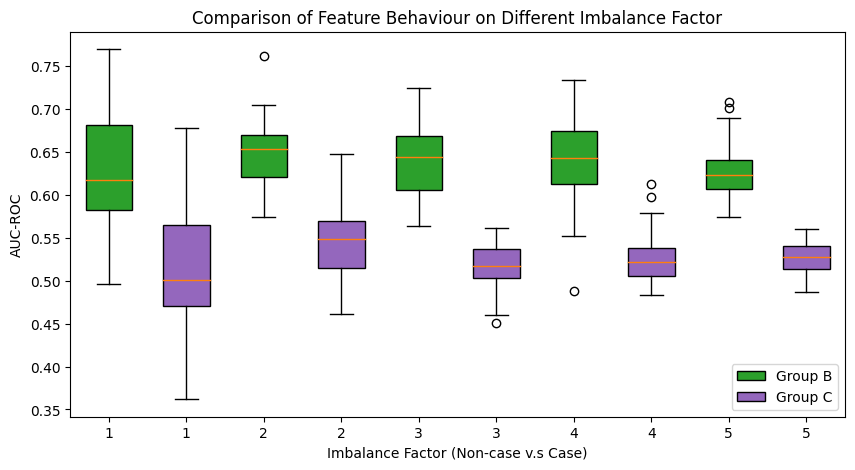

In [178]:
# Box plot B & C
fig, ax = plt.subplots(figsize=(10, 5))
bp_b = ax.boxplot(total_results_b, positions=[1,3,5,7,9], widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C2"), labels=["1", "2", "3", "4", "5"])

bp_c = ax.boxplot(total_results_c, positions=[2,4,6,8,10], widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C4"), labels=["1", "2", "3", "4", "5"])
ax.legend([bp_b["boxes"][0], bp_c["boxes"][0]], 
          ["Group B", "Group C"], loc="lower right")
plt.xlabel("Imbalance Factor (Non-case v.s Case)")
plt.ylabel("AUC-ROC")
plt.title("Comparison of Feature Behaviour on Different Imbalance Factor")
plt.show()

From this figure above, we can see the performance of feature group B and C are varies a lot with different imbalance factors. Although both of them show trends of not changing much during imbalance factor change, group B has a generally higher performance, where it even dominated that of group C in some comparisons. 

---

In [186]:
d_group = list(columns[-3:])+["is_case"]

# Group C
# Split positive and negative
pos_d = case[d_group]
neg_d = non_case[d_group]

total_results_d = []
for ratio in range(1, 6):
    repeat_results_d = []
    for i in range(0, 30):
        clf_d = RandomForestClassifier()
        random_neg = neg_d.sample(frac=1)
        random_neg = random_neg.iloc[:len(pos_d)*ratio]
        random_dataset = pd.concat([pos_d, random_neg])
        x, y = random_dataset.drop(["is_case"], axis=1), random_dataset["is_case"]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        clf_d.fit(x_train, y_train)
        y_pred = clf_d.predict(x_test)
        repeat_results_d.append(roc_auc_score(y_test, y_pred))
    total_results_d.append(repeat_results_d)


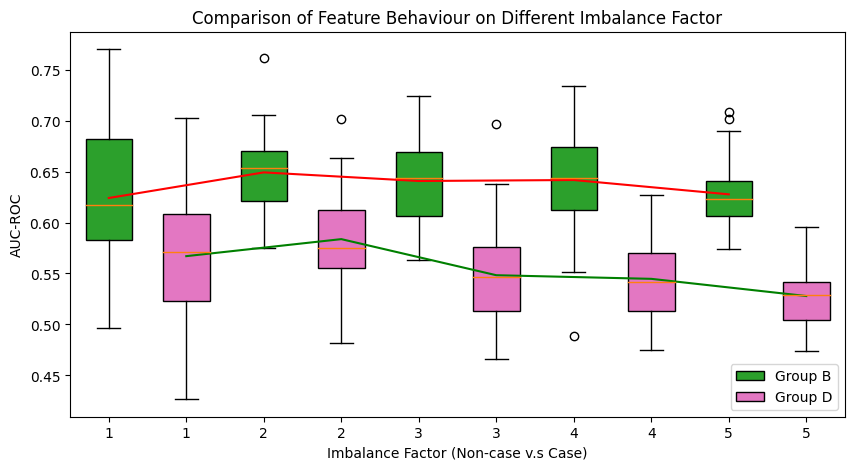

In [193]:
# Box plot A & B
fig, ax = plt.subplots(figsize=(10, 5))
bp_b = ax.boxplot(total_results_b, positions=[1,3,5,7,9], widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C2"), labels=["1", "2", "3", "4", "5"])

bp_d = ax.boxplot(total_results_d, positions=[2,4,6,8,10], widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C6"), labels=["1", "2", "3", "4", "5"])
ax.legend([bp_b["boxes"][0], bp_d["boxes"][0]], 
          ["Group B", "Group D"], loc="lower right")
plt.xlabel("Imbalance Factor (Non-case v.s Case)")
plt.ylabel("AUC-ROC")
plt.title("Comparison of Feature Behaviour on Different Imbalance Factor")
plt.plot([1, 3, 5, 7, 9], [sum(b)/len(b) for b in total_results_b], color="red")
plt.plot([2, 4, 6, 8, 10], [sum(b)/len(b) for b in total_results_d], color="green")
plt.show()

From the figure above we could see feature group D shows a degrading behaviour on average. Therefore, it is more likely that it shows worse performance when the imbalance factor is even higher. We could get rid of group D in favour of group B in this case. 

---

### Summary
There are three situations for such comparison:
1. One group shows non-decreasing trend while the other shows decreasing trend (group B & D); 
2. Both groups show non-decreasing trend but one has lower performance in general (group B & C);
3. Both groups show similar performance with non-decreasing trend (group A & B)
In scenarios 1 and 2, it is easy for us to decide which features are likely to be more influencial (both B in this case). However, in scenario 3, it is hard to tell. Therefore, we need to further validate which group is better. 